In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# 10 NEURONS

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
original_y_test = y_test.copy()
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model_10 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="sigmoid"),
    ]
)

model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [205]:
batch_size = 128
epochs = 15
model_10.compile(loss="cosine_similarity", optimizer="adam", metrics=["accuracy"])
model_10.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: -0.8866 - accuracy: 0.8742 - val_loss: -0.9737 - val_accuracy: 0.9720
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9646 - accuracy: 0.9599 - val_loss: -0.9825 - val_accuracy: 0.9802
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9733 - accuracy: 0.9700 - val_loss: -0.9870 - val_accuracy: 0.9848
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9771 - accuracy: 0.9736 - val_loss: -0.9887 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9801 - accuracy: 0.9772 - val_loss: -0.9890 - val_accuracy: 0.9878
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9825 - accuracy: 0.9803 - val_loss: -0.9903 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9839 - accuracy: 0.9818 - val_loss: -0.9909 - val_accuracy:

In [206]:
score = model_10.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: -0.9911422729492188
Test accuracy: 0.9896000027656555


# 4 neuron

In [5]:
dict2 = { 
(0,0,1,0):0,
(1,0,0,0):1,
(0,0,1,1):2,
(0,1,0,0):3,
(0,1,0,1):4,
(0,1,1,0):5,
(1,1,0,0):6,
(0,0,0,1):7,
(0,1,1,1):8,
(1,1,0,1):9,
}

In [6]:
aa = [
[0,0,1,0],
[1,0,0,0],
[0,0,1,1],
[0,1,0,0],
[0,1,0,1],
[0,1,1,0],
[1,1,0,0],
[0,0,0,1],
[0,1,1,1],
[1,1,0,1]]

In [7]:
y_4_train = []
y_4_test = []

for y in y_train:
    y_4_train.append(list(np.dot(y,aa)))
y_4_train = np.array(y_4_train)

for y in y_test:
    y_4_test.append(list(np.dot(y,aa)))
y_4_test = np.array(y_4_test)

In [207]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="sigmoid"),
    ]
)

model_4.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_189 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_168 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_190 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_72 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_72 (Dropout)        (None, 1600)            

In [208]:
batch_size = 128
epochs = 15
model_4.compile(loss="cosine_similarity", optimizer="adam")
model_4.fit(x_train, y_4_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9135 - val_loss: -0.9726
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9637 - val_loss: -0.9812
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9707 - val_loss: -0.9837
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9744 - val_loss: -0.9868
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9770 - val_loss: -0.9878
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9786 - val_loss: -0.9887
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9795 - val_loss: -0.9878
Epoch 8/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9806 - val_loss: -0.9896
Epoch 9/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9815 - val_loss: -0.9904
Epoch 10/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9822

In [209]:
prediction = model_4.predict(x_test)

In [210]:
norm_prediction = []
number_decoding_errs = 0
for y in prediction:
    try:
        t_y = tuple(np.round(y).astype('int'))
        norm_prediction.append(dict2[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(5)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 124 times
accuracy:  0.9588


## +1 Convolutional layer

In [214]:
model_4_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="sigmoid"),
    ]
)

model_4_1.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_200 (Conv2D)         (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_176 (MaxPooli  (None, 12, 12, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_201 (Conv2D)         (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_177 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_202 (Conv2D)         (None, 3, 3, 64)          18496     
                                                                 
 flatten_76 (Flatten)        (None, 576)             

In [215]:
batch_size = 128
epochs = 15
model_4_1.compile(loss="cosine_similarity", optimizer="adam")
model_4_1.fit(x_train, y_4_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9301 - val_loss: -0.9837
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9769 - val_loss: -0.9884
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9827 - val_loss: -0.9904
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9854 - val_loss: -0.9917
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9872 - val_loss: -0.9931
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9884 - val_loss: -0.9929
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9894 - val_loss: -0.9944
Epoch 8/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9900 - val_loss: -0.9939
Epoch 9/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9906 - val_loss: -0.9943
Epoch 10/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9914

In [216]:
prediction = model_4_1.predict(x_test)

In [217]:
norm_prediction = []
number_decoding_errs = 0
for y in prediction:
    try:
        t_y = tuple(np.round(y).astype('int'))
        norm_prediction.append(dict2[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(5)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 64 times
accuracy:  0.981


## +2 Convolutional layers

In [231]:
model_4_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(5, 5), activation="relu"),
       # layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="sigmoid"),
    ]
)

model_4_2.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_240 (Conv2D)         (None, 24, 24, 8)         208       
                                                                 
 conv2d_241 (Conv2D)         (None, 22, 22, 16)        1168      
                                                                 
 max_pooling2d_202 (MaxPooli  (None, 11, 11, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_242 (Conv2D)         (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_203 (MaxPooli  (None, 4, 4, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_243 (Conv2D)         (None, 2, 2, 64)        

In [232]:
batch_size = 128
epochs = 15
model_4_2.compile(loss="cosine_similarity", optimizer="adam")
model_4_2.fit(x_train, y_4_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9218 - val_loss: -0.9802
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9732 - val_loss: -0.9879
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9803 - val_loss: -0.9910
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9842 - val_loss: -0.9910
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9864 - val_loss: -0.9937
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9874 - val_loss: -0.9951
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9891 - val_loss: -0.9940
Epoch 8/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9902 - val_loss: -0.9945
Epoch 9/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9907 - val_loss: -0.9956
Epoch 10/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9913

In [235]:
prediction = model_4_2.predict(x_test)

In [236]:
norm_prediction = []
number_decoding_errs = 0
for y in prediction:
    try:
        t_y = tuple(np.round(y).astype('int'))
        norm_prediction.append(dict2[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(5)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 13 times
accuracy:  0.9856


## +3 Convolutional layers

In [239]:
model_4_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
       # layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="sigmoid"),
    ]
)

model_4_3.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_254 (Conv2D)         (None, 24, 24, 16)        416       
                                                                 
 conv2d_255 (Conv2D)         (None, 22, 22, 16)        2320      
                                                                 
 conv2d_256 (Conv2D)         (None, 20, 20, 16)        2320      
                                                                 
 max_pooling2d_208 (MaxPooli  (None, 10, 10, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_257 (Conv2D)         (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_209 (MaxPooli  (None, 4, 4, 32)         0         
 ng2D)                                               

In [240]:
batch_size = 128
epochs = 15
model_4_3.compile(loss="cosine_similarity", optimizer="adam")
model_4_3.fit(x_train, y_4_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9274 - val_loss: -0.9845
Epoch 2/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9760 - val_loss: -0.9898
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9827 - val_loss: -0.9908
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9862 - val_loss: -0.9931
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9881 - val_loss: -0.9945
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9897 - val_loss: -0.9948
Epoch 7/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9904 - val_loss: -0.9954
Epoch 8/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9910 - val_loss: -0.9948
Epoch 9/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9920 - val_loss: -0.9964
Epoch 10/15
422/422 [==============================] - 3s 6ms/step - loss: -0.9925

In [241]:
prediction = model_4_3.predict(x_test)

In [242]:
norm_prediction = []
number_decoding_errs = 0
for y in prediction:
    try:
        t_y = tuple(np.round(y).astype('int'))
        norm_prediction.append(dict2[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(5)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 16 times
accuracy:  0.9884


# 5 neuron

In [243]:
dict5 = {(0,0,0,1,1):0,
        (0,0,1,0,1):1,
        (0,0,1,1,0):2,
        (0,1,0,0,1):3,
        (0,1,0,1,0):4,
        (0,1,1,0,0):5,
        (1,0,0,0,1):6,
        (1,0,0,1,0):7,
        (1,0,1,0,0):8,
        (1,1,0,0,0):9}

In [244]:
A =  [[0,0,0,1,1],
      [0,0,1,0,1],
      [0,0,1,1,0],
      [0,1,0,0,1],
      [0,1,0,1,0],
      [0,1,1,0,0],
      [1,0,0,0,1],
      [1,0,0,1,0],
      [1,0,1,0,0],
      [1,1,0,0,0]]

In [245]:
y_5_train = []
y_5_test = []

for y in y_train:
    y_5_train.append(list(np.dot(y,aa5)))
y_5_train = np.array(y_5_train)

for y in y_test:
    y_5_test.append(list(np.dot(y,aa5)))
y_5_test = np.array(y_5_test)

In [7]:
model_5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="sigmoid"),
    ]
)

model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [356]:
batch_size = 128
epochs = 15
model_5.compile(loss="cosine_similarity", optimizer="adam")
model_5.fit(x_train, y_5_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9799 - val_loss: -0.9883
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9802 - val_loss: -0.9885
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9807 - val_loss: -0.9888
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9812 - val_loss: -0.9892
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9811 - val_loss: -0.9887
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9818 - val_loss: -0.9888
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9822 - val_loss: -0.9888
Epoch 8/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9820 - val_loss: -0.9893
Epoch 9/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9821 - val_loss: -0.9894
Epoch 10/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9822

In [357]:
prediction = model_5.predict(x_test)

In [358]:
prediction = np.round(prediction,2)
ind_pred = np.argsort(prediction,axis=1)[:,-2:]
norm_prediction = []
number_decoding_errs = 0
for y in ind_pred:
    try:
        t_y=tuple([1 if x in y else 0 for x in range(5)])
        norm_prediction.append(dict5[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(9)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 0 times
accuracy:  0.9794


## +1 Convolutional layer

In [345]:
model_5_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="sigmoid"),
    ]
)

model_5_1.summary()

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_292 (Conv2D)         (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_243 (MaxPooli  (None, 12, 12, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_293 (Conv2D)         (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_244 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_294 (Conv2D)         (None, 3, 3, 64)          18496     
                                                                 
 flatten_111 (Flatten)       (None, 576)            

In [353]:
batch_size = 128
epochs = 15

model_5_1.compile(loss="cosine_similarity", optimizer="adam")

model_5_1.fit(x_train, y_5_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9918 - val_loss: -0.9950
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9921 - val_loss: -0.9947
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9925 - val_loss: -0.9953
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9924 - val_loss: -0.9949
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9930 - val_loss: -0.9954
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9932 - val_loss: -0.9953
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9933 - val_loss: -0.9954
Epoch 8/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9934 - val_loss: -0.9953
Epoch 9/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9937 - val_loss: -0.9956
Epoch 10/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9939

In [354]:
prediction = model_5_1.predict(x_test)

In [355]:
prediction = np.round(prediction,2)
ind_pred = np.argsort(prediction,axis=1)[:,-2:]
norm_prediction = []
number_decoding_errs = 0
for y in ind_pred:
    try:
        t_y=tuple([1 if x in y else 0 for x in range(5)])
        norm_prediction.append(dict5[t_y])
    except:
        number_decoding_errs+=1
        norm_prediction.append(9)
        
print('decoding error occured: {} times'.format(number_decoding_errs))
print('accuracy: ', sum([y == x for x, y in zip(norm_prediction, original_y_test)])/len(original_y_test))

decoding error occured: 0 times
accuracy:  0.992


# 10 neurons again

In [10]:
model_10_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="sigmoid"),
    ]
)

model_10_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [7]:
batch_size = 128
epochs = 15

model_10_2.compile(loss="cosine_similarity", optimizer="adam", metrics=["accuracy"])

model_10_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 9s 6ms/step - loss: -0.8775 - accuracy: 0.8679 - val_loss: -0.9760 - val_accuracy: 0.9728
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9644 - accuracy: 0.9602 - val_loss: -0.9832 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9731 - accuracy: 0.9694 - val_loss: -0.9864 - val_accuracy: 0.9842
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9775 - accuracy: 0.9743 - val_loss: -0.9862 - val_accuracy: 0.9840
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9801 - accuracy: 0.9776 - val_loss: -0.9881 - val_accuracy: 0.9860
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9820 - accuracy: 0.9794 - val_loss: -0.9890 - val_accuracy: 0.9865
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9837 - accuracy: 0.9811 - val_loss: -0.9896 - val_accuracy:

In [282]:
score = model_10_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: -0.9909372329711914
Test accuracy: 0.9890000224113464


In [9]:
model_10_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="sigmoid"),
    ]
)

model_10_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dropout_3 (Dropout)         (None, 400)              

In [11]:
batch_size = 128
epochs = 15

model_10_2.compile(loss="cosine_similarity", optimizer="adam", metrics=["accuracy"])

model_10_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: -0.8769 - accuracy: 0.8643 - val_loss: -0.9751 - val_accuracy: 0.9730
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: -0.9633 - accuracy: 0.9583 - val_loss: -0.9813 - val_accuracy: 0.9777
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9722 - accuracy: 0.9689 - val_loss: -0.9850 - val_accuracy: 0.9832
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9759 - accuracy: 0.9725 - val_loss: -0.9874 - val_accuracy: 0.9867
Epoch 5/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9790 - accuracy: 0.9761 - val_loss: -0.9889 - val_accuracy: 0.9877
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9804 - accuracy: 0.9777 - val_loss: -0.9897 - val_accuracy: 0.9878
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: -0.9827 - accuracy: 0.9804 - val_loss: -0.9905 - val_accuracy:

# Visual

In [360]:
import visualkeras

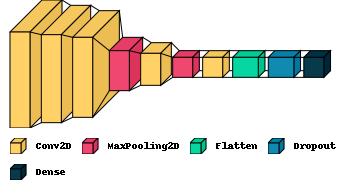

In [361]:
visualkeras.layered_view(model_4_3,legend=True)

# from keras_visualizer import visualizer 

In [395]:
model_100_50_10 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(100, activation="sigmoid"),
        layers.Dense(50, activation="sigmoid"),
        layers.Dense(10, activation="sigmoid"),
    ]
)

model_100_50_10.summary()

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_118 (Flatten)       (None, 784)               0         
                                                                 
 dense_150 (Dense)           (None, 100)               78500     
                                                                 
 dense_151 (Dense)           (None, 50)                5050      
                                                                 
 dense_152 (Dense)           (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [389]:
visualizer(model_100_50_10, format='png', view=True)


In [396]:
model_100_50_10 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(100, activation="sigmoid"),
        layers.Dense(50, activation="sigmoid"),
        layers.Dense(4, activation="sigmoid"),
    ]
)

model_100_50_10.summary()

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_119 (Flatten)       (None, 784)               0         
                                                                 
 dense_153 (Dense)           (None, 100)               78500     
                                                                 
 dense_154 (Dense)           (None, 50)                5050      
                                                                 
 dense_155 (Dense)           (None, 4)                 204       
                                                                 
Total params: 83,754
Trainable params: 83,754
Non-trainable params: 0
_________________________________________________________________
